In [95]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import seaborn as sns
from sklearn.model_selection import cross_val_score
import tensorflow as tf


In [2]:
#Load data
df = pd.read_csv('ipl_matches.csv')

#df['runs_won_by'] = df['runs_won_by'].apply(lambda x: True if x is not None else false)



In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   team1            752 non-null    int64  
 1   team2            752 non-null    int64  
 2   date             752 non-null    object 
 3   year             752 non-null    int64  
 4   time             752 non-null    object 
 5   place            752 non-null    object 
 6   toss_winner      752 non-null    int64  
 7   toss_decision    752 non-null    object 
 8   winner           752 non-null    object 
 9   winner_number    752 non-null    int64  
 10  won_toss_game    752 non-null    int64  
 11  tied             9 non-null      float64
 12  runs_won_by      333 non-null    float64
 13  wickets_won_by   406 non-null    float64
 14  balls_remaining  91 non-null     float64
dtypes: float64(4), int64(6), object(5)
memory usage: 88.2+ KB


In [4]:
#Data cleaning
df['runs_won_by'].fillna(0,inplace=True)
df['wickets_won_by'].fillna(0,inplace=True)
df['balls_remaining'].fillna(0,inplace=True)
df['tied'].fillna(0, inplace=True)

df['date'] = pd.to_datetime(df['date'])

dtype_columns_change = ['team1', 'team2', 'tied','winner_number', 'toss_winner', 'runs_won_by', 'wickets_won_by','balls_remaining']
df[dtype_columns_change] = df[dtype_columns_change].astype('int64')

cols_to_drop = ["time", "place"]
df = df.drop(columns =cols_to_drop, axis = 1)


"""{'Deccan Chargers'1, 'Delhi Capitals'2, 'Royal Challengers Bangalore'2,
       'Rajasthan Royals'4, 'Mumbai Indians'5, 'Chennai Super Kings'6,
       'Sunrisers Hyderabad'7, 'Kolkata Knight Riders'8, 'Kings XI Punjab'9,
       'Rising Pune Supergiants'10, 'Kochi Tuskers Kerala'11, 'Pune Warriors'13,
       'Gujarat Lion'13}"""

"{'Deccan Chargers'1, 'Delhi Capitals'2, 'Royal Challengers Bangalore'2,\n       'Rajasthan Royals'4, 'Mumbai Indians'5, 'Chennai Super Kings'6,\n       'Sunrisers Hyderabad'7, 'Kolkata Knight Riders'8, 'Kings XI Punjab'9,\n       'Rising Pune Supergiants'10, 'Kochi Tuskers Kerala'11, 'Pune Warriors'13,\n       'Gujarat Lion'13}"

In [5]:
df.isnull().sum()

team1              0
team2              0
date               0
year               0
toss_winner        0
toss_decision      0
winner             0
winner_number      0
won_toss_game      0
tied               0
runs_won_by        0
wickets_won_by     0
balls_remaining    0
dtype: int64

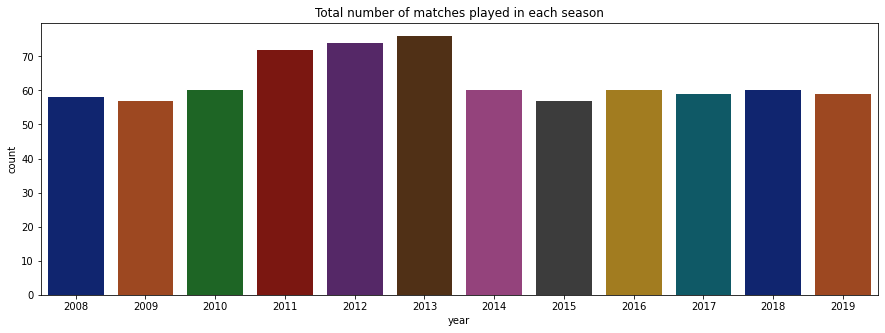

In [6]:
plt.subplots(figsize = (15,5))
sns.countplot(x = 'year', data = df, palette= 'dark')
plt.title('Total number of matches played in each season')
plt.show()

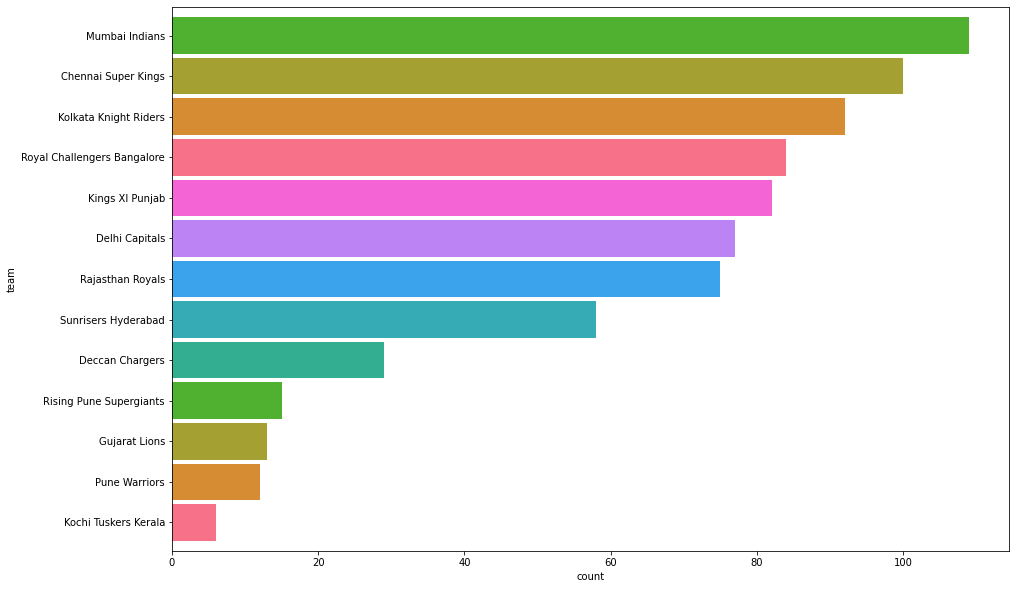

In [7]:
plt.subplots(figsize = (15,10))
ax = df['winner'].value_counts().sort_values(ascending = True).plot.barh(width = .9, color = sns.color_palette("husl", 9))
ax.set_xlabel('count')
ax.set_ylabel('team')
plt.show()

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   team1            752 non-null    int64         
 1   team2            752 non-null    int64         
 2   date             752 non-null    datetime64[ns]
 3   year             752 non-null    int64         
 4   toss_winner      752 non-null    int64         
 5   toss_decision    752 non-null    object        
 6   winner           752 non-null    object        
 7   winner_number    752 non-null    int64         
 8   won_toss_game    752 non-null    int64         
 9   tied             752 non-null    int64         
 10  runs_won_by      752 non-null    int64         
 11  wickets_won_by   752 non-null    int64         
 12  balls_remaining  752 non-null    int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 76.5+ KB


In [8]:
deep_df = df.copy(deep = True)

deep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   team1            752 non-null    int64         
 1   team2            752 non-null    int64         
 2   date             752 non-null    datetime64[ns]
 3   year             752 non-null    int64         
 4   toss_winner      752 non-null    int64         
 5   toss_decision    752 non-null    object        
 6   winner           752 non-null    object        
 7   winner_number    752 non-null    int64         
 8   won_toss_game    752 non-null    int64         
 9   tied             752 non-null    int64         
 10  runs_won_by      752 non-null    int64         
 11  wickets_won_by   752 non-null    int64         
 12  balls_remaining  752 non-null    int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 76.5+ KB


In [9]:
numerical_columns = [
    col for col in df.columns if 
    (df[col].dtype == 'int64' or 
     df[col].dtype == 'float64' 
    ) 
]

numerical_columns

['team1',
 'team2',
 'year',
 'toss_winner',
 'winner_number',
 'won_toss_game',
 'tied',
 'runs_won_by',
 'wickets_won_by',
 'balls_remaining']

In [10]:
df[numerical_columns].describe().loc[['min', 'max', 'mean', '50%'],:]

,team1,team2,year,toss_winner,winner_number,won_toss_game,tied,runs_won_by,wickets_won_by,balls_remaining
min,1.000000,1.000000,2008.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,13.000000,13.000000,2019.00000,13.000000,13.000000,1.000000,1.000000,146.000000,10.000000,87.000000
mean,5.696809,5.743351,2013.43617,5.634309,5.703457,0.522606,0.011968,13.348404,3.368351,1.571809
50%,5.000000,5.000000,2013.00000,5.000000,6.000000,1.000000,0.000000,0.000000,4.000000,0.000000


In [11]:
percentages = []

for team in list (df['winner'].unique()):
    p = round((df['won_toss_game'][df['winner'] == team].value_counts()
    [1]/df['won_toss_game'][df['winner']==team].value_counts().sum())*100,2)

    percentages.append(p)
    print(team , '(%  won toss and game): ' , p)

Deccan Chargers (%  won toss and game):  65.52
Delhi Capitals (%  won toss and game):  54.55
Royal Challengers Bangalore (%  won toss and game):  48.81
Rajasthan Royals (%  won toss and game):  56.0
Mumbai Indians (%  won toss and game):  51.38
Chennai Super Kings (%  won toss and game):  57.0
Sunrisers Hyderabad (%  won toss and game):  39.66
Kolkata Knight Riders (%  won toss and game):  57.61
Kings XI Punjab (%  won toss and game):  42.68
Rising Pune Supergiants (%  won toss and game):  53.33
Kochi Tuskers Kerala (%  won toss and game):  66.67
Pune Warriors (%  won toss and game):  25.0
Gujarat Lions (%  won toss and game):  76.92


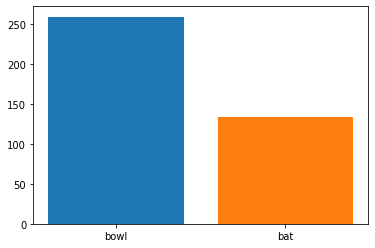

In [12]:
bowl_count =df['won_toss_game'][df['toss_decision'] == "bowl"].value_counts()[1]
bat_count = df['won_toss_game'][df['toss_decision'] == "bat"].value_counts()[1]
plt.bar(0, bowl_count)
plt.bar(1, bat_count)
plt.xticks((0,1),('bowl', 'bat'))
    
plt.show()

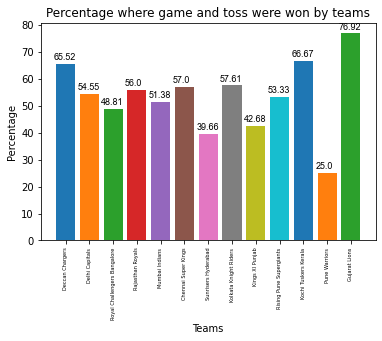

In [13]:
unique_team = df['winner'].unique()

font = {'family': 'arial',
        'color':  'black',
        'weight': 'normal',
        'size': 9,
        }


plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.bar(2, percentages[2])
plt.bar(3, percentages[3])
plt.bar(4, percentages[4])
plt.bar(5, percentages[5])
plt.bar(6, percentages[6])
plt.bar(7, percentages[7])
plt.bar(8, percentages[8])
plt.bar(9, percentages[9])
plt.bar(10, percentages[10])
plt.bar(11, percentages[11])
plt.bar(12, percentages[12])


plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12),unique_team)
plt.xticks(fontsize = 5, rotation = 90)
plt.ylabel('Percentage')
plt.xlabel('Teams')
plt.title('Percentage where game and toss were won by teams')


for i, v in enumerate(percentages[:]):
    plt.text(i-.5, v + 1.5 , str(v), fontdict=font)

plt.show()




Text(0.5, 1.0, 'Percentage of matches with both coin toss and game win by team')

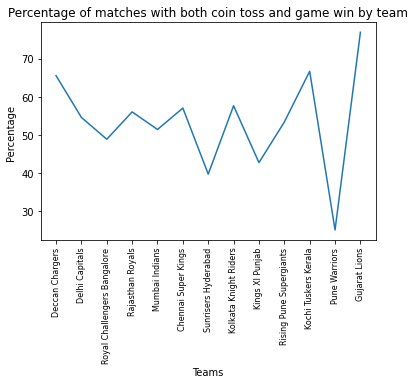

In [14]:
plt.plot(percentages[:])
plt.xticks((0,1,2,3,4,5,6,7,8,9,10,11,12),unique_team)
plt.xticks(fontsize = 8, rotation = 90)
plt.xlabel("Teams")
plt.ylabel("Percentage ")
plt.title("Percentage of matches with both coin toss and game win by team")




Text(0, 0.5, 'Frequency')

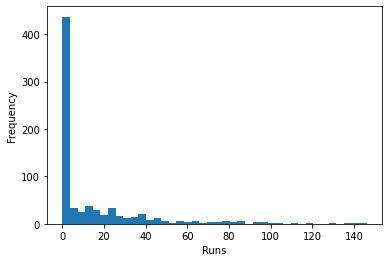

In [15]:
plt.hist(df["runs_won_by"],bins=40)
plt.xlabel("Runs")
plt.ylabel("Frequency")

Text(0.5, 1.0, 'Matches were the coin toss and the game were won (won_toss_game = 1)')

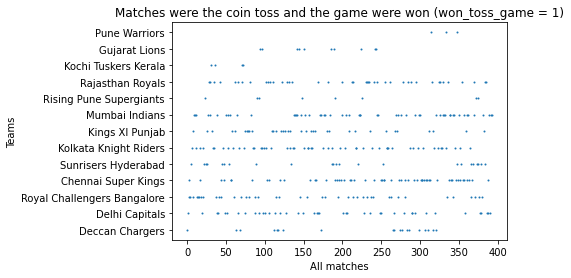

In [16]:
plt.scatter(x=range(len(list(df["winner"][df["won_toss_game"]==1]))),y=df["winner"][df["won_toss_game"]==1],s=1)
plt.ylabel("Teams")
plt.xlabel("All matches")
plt.title("Matches were the coin toss and the game were won (won_toss_game = 1)")

In [17]:
cleaned_df = pd.get_dummies(df)
cleaned_df.head()

,team1,team2,date,year,toss_winner,winner_number,won_toss_game,tied,runs_won_by,wickets_won_by,...,winner_Gujarat Lions,winner_Kings XI Punjab,winner_Kochi Tuskers Kerala,winner_Kolkata Knight Riders,winner_Mumbai Indians,winner_Pune Warriors,winner_Rajasthan Royals,winner_Rising Pune Supergiants,winner_Royal Challengers Bangalore,winner_Sunrisers Hyderabad
0,5,1,2008-04-27,2008,1,1,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0
1,2,9,2009-04-19,2009,2,2,1,0,0,10,...,0,0,0,0,0,0,0,0,0,0
2,3,4,2010-03-18,2010,3,3,1,0,0,10,...,0,0,0,0,0,0,0,0,1,0
3,5,4,2011-05-20,2011,5,4,0,0,0,10,...,0,0,0,0,0,0,1,0,0,0
4,4,5,2012-05-20,2012,4,5,0,0,0,10,...,0,0,0,0,1,0,0,0,0,0


In [23]:
#Avoid dummy variable trap/multicollinearity by dropping column and removing non essential columns
cleaned_df = cleaned_df.drop(columns=['winner_Gujarat Lions', 'date'], axis = 1)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   team1                               752 non-null    int64
 1   team2                               752 non-null    int64
 2   year                                752 non-null    int64
 3   toss_winner                         752 non-null    int64
 4   winner_number                       752 non-null    int64
 5   won_toss_game                       752 non-null    int64
 6   tied                                752 non-null    int64
 7   runs_won_by                         752 non-null    int64
 8   wickets_won_by                      752 non-null    int64
 9   balls_remaining                     752 non-null    int64
 10  toss_decision_bat                   752 non-null    uint8
 11  toss_decision_bowl                  752 non-null    uint8
 12  winner_C

In [ ]:
cleaned_df.to_csv('cleaned_data.csv')

In [43]:
#Separating feature from label
label = cleaned_df['won_toss_game']
feature =cleaned_df.drop(columns=['won_toss_game'],axis=1)


In [44]:
X_train, X_test, y_train, y_test= train_test_split(feature, label, test_size=0.3)

In [45]:
#Scaling data
sc_x = StandardScaler()
X_test = sc_x.fit_transform(X_test)
X_train = sc_x.fit_transform(X_train)

In [79]:
#Support vector machine/Fitting model
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)

#Use confusion matrix to determine model accuracy
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')

#Checking accuracy of model
numerator_svc = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]
denominator_svc = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])
accuracy_percentage = (numerator_svc/denominator_svc) * 100
print("Accuracy : ",round(accuracy_percentage,2),"%")

#Cross validation
cross_val_svc = cross_val_score(estimator = SVC(kernel = 'rbf'), X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_svc.mean() * 100 , 2),"%")

[[ 91   5]
 [  7 123]]

Accuracy :  94.69 %
Cross Validation Accuracy :  95.05 %


In [93]:
#Random forest validation/Fitting model
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train, y_train)
y_pred_rfc = random_forest_classifier.predict(X_test)


#Use confusion matrix to determine model accuracy
cm_random_forest_classifier = confusion_matrix(y_test, y_pred_rfc)
print(cm_random_forest_classifier, end = '\n\n')


#Checking accuracy of model
numerator_rfc = cm_random_forest_classifier[0][0] + cm_random_forest_classifier[1][1]
denominator_rfc = sum(cm_random_forest_classifier[0]) + sum(cm_random_forest_classifier[1])
accuracy_percentage = (numerator_rfc/denominator_rfc) * 100
print("Accuracy : ",round(accuracy_percentage,2),"%")

#Cross validation
cross_val_rfc = cross_val_score(estimator=RandomForestClassifier(), X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_rfc.mean() * 100 , 2),"%")

[[ 95   1]
 [  1 129]]

Accuracy :  99.12 %
Cross Validation Accuracy :  98.29 %


In [92]:
#XGBoost model (The best model?)

#Fitting model
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train,y_train)
y_pred_xgb = xgb_classifier.predict(X_test)


#Use confusion matrix to determine model accuracy
cm_xgb_classifier = confusion_matrix(y_test, y_pred_rfc)
print(cm_xgb_classifier, end = '\n\n')

#Checking accuracy of model
numerator_xgb = cm_xgb_classifier[0][0] + cm_xgb_classifier[1][1]
denominator_xgb = sum(cm_xgb_classifier[0]) + sum(cm_xgb_classifier[1])
accuracy_percentage = (numerator_xgb/denominator_xgb) * 100
print("Accuracy : ",round(accuracy_percentage,2),"%")

#Cross validation
cross_val_xgb = cross_val_score(estimator=XGBClassifier(), X = X_train, y = y_train, cv = 10, n_jobs = -1)
print("Cross Validation Accuracy : ",round(cross_val_xgb.mean() * 100 , 2),"%")




[[ 94   2]
 [  1 129]]

Accuracy :  98.67 %
Cross Validation Accuracy :  97.91 %


In [96]:
#Deep learning with tensor flow
deep_df.info()
deep_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 752 entries, 0 to 751
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   team1            752 non-null    int64         
 1   team2            752 non-null    int64         
 2   date             752 non-null    datetime64[ns]
 3   year             752 non-null    int64         
 4   toss_winner      752 non-null    int64         
 5   toss_decision    752 non-null    object        
 6   winner           752 non-null    object        
 7   winner_number    752 non-null    int64         
 8   won_toss_game    752 non-null    int64         
 9   tied             752 non-null    int64         
 10  runs_won_by      752 non-null    int64         
 11  wickets_won_by   752 non-null    int64         
 12  balls_remaining  752 non-null    int64         
dtypes: datetime64[ns](1), int64(10), object(2)
memory usage: 76.5+ KB


,team1,team2,date,year,toss_winner,toss_decision,winner,winner_number,won_toss_game,tied,runs_won_by,wickets_won_by,balls_remaining
0,5,1,2008-04-27,2008,1,bowl,Deccan Chargers,1,1,0,0,10,48
1,2,9,2009-04-19,2009,2,bowl,Delhi Capitals,2,1,0,0,10,7
2,3,4,2010-03-18,2010,3,bowl,Royal Challengers Bangalore,3,1,0,0,10,56
3,5,4,2011-05-20,2011,5,bat,Rajasthan Royals,4,0,0,0,10,0
4,4,5,2012-05-20,2012,4,bat,Mumbai Indians,5,0,0,0,10,0


In [98]:
# separating the features and labels
deep_feature = deep_df.drop(columns=["won_toss_game"],axis=1)
deep_label = deep_df["won_toss_game"]



In [120]:
categorical_columns = [col for col in deep_feature.columns 
                       if len(deep_feature[col].unique())==2 
                       or deep_feature[col].dtype=='O']

print(categorical_columns)

continuous_columns = [col for col in deep_feature.columns 
                      if len(deep_feature[col].unique())>2 
                      and (deep_feature[col].dtype=='int64' 
                      or deep_feature[col].dtype=='float64')]
print(continuous_columns)

['toss_decision', 'winner', 'tied']
['team1', 'team2', 'year', 'toss_winner', 'winner_number', 'runs_won_by', 'wickets_won_by', 'balls_remaining']


In [119]:
#Create train and test data
X_T, X_t, y_T, y_t = train_test_split(deep_feature, deep_label, test_size=0.3)

#Scale data
cols_to_scale = continuous_columns[:]
cols_to_remove = ("team1", 'team2', 'year', 'toss_winner', 'winner_number')
for col in cols_to_remove:
    cols_to_scale.remove(col)

scaler = StandardScaler()
X_T.loc[:, cols_to_scale] = scaler.fit_transform(X_T.loc[:, cols_to_scale])   
X_t.loc[:, cols_to_scale] = scaler.fit_transform(X_t.loc[:, cols_to_scale])   

In [129]:
#Create feature columns for categorical columns by data type
categorical_objects_feature_cols = [tf.feature_column.embedding_column(                                   
                                    tf.feature_column.categorical_column_with_hash_bucket(key=col,hash_bucket_size=15), 
                                    dimension = len(deep_df[col].unique()))
                                    for col in categorical_columns if deep_df[col].dtype=='O']
categorical_integer_feature_cols = [tf.feature_column.embedding_column(                 
                                 tf.feature_column.categorical_column_with_identity(key=col,num_buckets=2),
                                 dimension = len(deep_df[col].unique()))
                                 for col in categorical_columns if deep_df[col].dtype=='int64']

#Create feature columns for continuous columns
continuous_feature_cols = [tf.feature_column.numeric_column(key=col)]

In [130]:
#Combining all feature columns 
feat_cols = [categorical_objects_feature_cols + 
             categorical_integer_feature_cols +
             continuous_feature_cols]

In [132]:
#Create functions to input dataset into tensorflow
input_function = tf.compat.v1.estimator.inputs.pandas_input_fn(X_T,y_T,batch_size=50,num_epochs=1000,shuffle=True)
pred_input_function = tf.compat.v1.estimator.inputs.pandas_input_fn(X_t,batch_size=50,shuffle=False)

In [133]:
#Create deep neural network
DNN_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10], feature_columns=feat_cols, n_classes=2)
DNN_model.train(input_fn=input_function, steps=5000)
predictions = DNN_model.predict(pred_input_function)

#Convert predictions into list of dictionaries
res_pred = list(predictions)
res_pred[0]

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\karln\\AppData\\Local\\Temp\\tmp0vze6mua', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


NameError: name 'input_fun' is not defined